In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../src")
from preprocessing import preprocess
# Setup để hiển thị biểu đồ đẹp hơn
df_raw = pd.read_csv("../data/train.csv")
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Đọc dữ liệu đã tiền xử lý
df = preprocess(df_raw)
print(df.head())



   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      1         3   
1   2          20         3         80.0     9600       1      1         3   
2   3          60         3         68.0    11250       1      1         0   
3   4          70         3         60.0     9550       1      1         0   
4   5          60         3         84.0    14260       1      1         0   

   LandContour  Utilities  ...  MoSold  YrSold  SaleType  SaleCondition  \
0            3          0  ...       2    2008         8              4   
1            3          0  ...       5    2007         8              4   
2            3          0  ...       9    2008         8              4   
3            3          0  ...       2    2006         8              0   
4            3          0  ...      12    2008         8              4   

   SalePrice  TotalSF  Age  RemodelAge  OverallQual_LotArea  \
0     208500     

In [27]:
print(df.shape)        # Kích thước
print(df.columns)      # Tên cột
print(df.dtypes)       # Kiểu dữ liệu
print(df.describe())   # Thống kê số liệu


(1460, 82)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

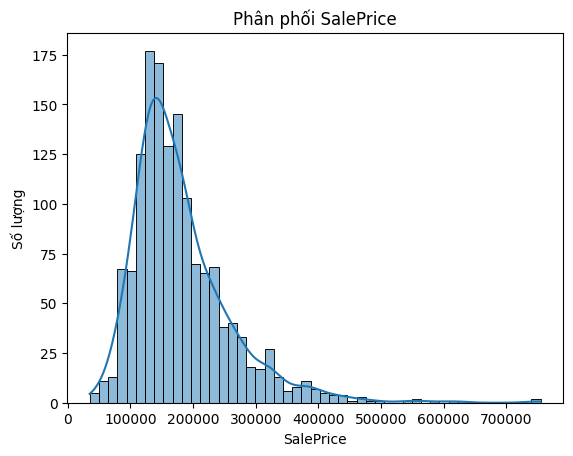

In [28]:
sns.histplot(df["SalePrice"], kde=True)
plt.title("Phân phối SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Số lượng")
plt.show()

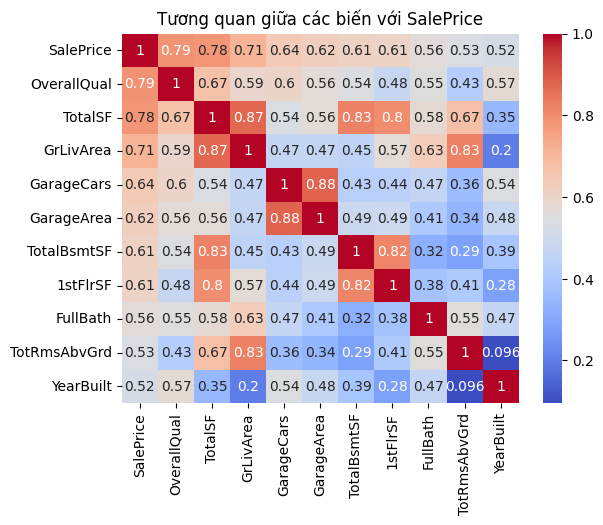

In [29]:
# Tính ma trận tương quan
corr = df.corr(numeric_only=True)

# Lấy top 10 biến có tương quan cao nhất với SalePrice
top_corr = corr["SalePrice"].abs().sort_values(ascending=False).head(11)
cols = top_corr.index.tolist()

# Vẽ heatmap
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title("Tương quan giữa các biến với SalePrice")
plt.show()


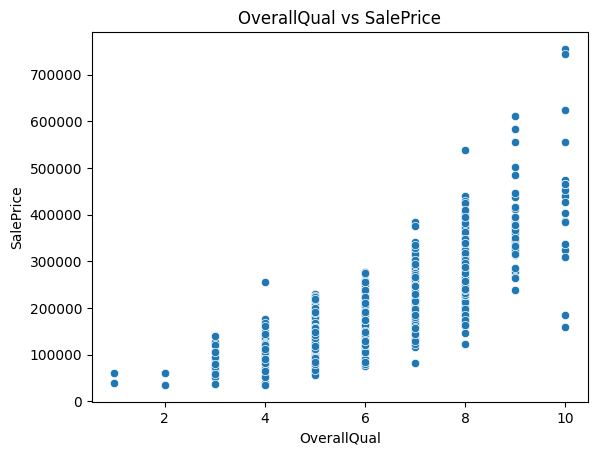

In [30]:
sns.scatterplot(x=df["OverallQual"], y=df["SalePrice"])
plt.title("OverallQual vs SalePrice")
plt.show()


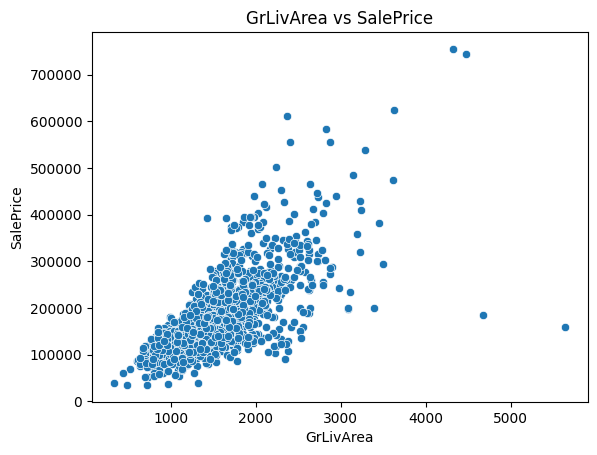

      GrLivArea  SalePrice
523        4676     184750
691        4316     755000
1182       4476     745000
1298       5642     160000


In [31]:
# Ví dụ: phát hiện giá trị GrLivArea quá lớn
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)
plt.title("GrLivArea vs SalePrice")
plt.show()

# Lọc ra những điểm có GrLivArea > 4000
outliers = df[df["GrLivArea"] > 4000]
print(outliers[["GrLivArea", "SalePrice"]])


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_vs_price(df, target="SalePrice", max_unique=10):
    categorical_cols = df.select_dtypes(include=["object"]).columns

    for col in categorical_cols:
        n_unique = df[col].nunique()
        if n_unique > max_unique:
            print(f"Bỏ qua {col} (có {n_unique} giá trị khác nhau)")
            continue
        
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=col, y=target, data=df)
        plt.title(f"{target} theo {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
plot_categorical_vs_price(df, target="SalePrice", max_unique=10)

In [1]:
import sys
import pandas as pd
sys.path.append('../src')
from modeling import *
from preprocessing import preprocess
from sklearn.model_selection import train_test_split

# Label là cột SalePrice, còn lại là features
#df = pd.read_csv("../data/train_clean.csv")
df_raw = pd.read_csv("../data/train.csv")

# Đọc dữ liệu đã tiền xử lý
df = preprocess(df_raw)
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]
#print(X.shape, y.shape)

# Chia train/test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train và evaluate Linear Regression
linear_model = train_linear(X_train, y_train)
rmse_linear = evaluate(linear_model, X_valid, y_valid)
print(f"Linear Regression RMSE: {rmse_linear:.2f}")

# Train và evaluate Random Forest
rf_model = train_rf(X_train, y_train)
rmse_rf = evaluate(rf_model, X_valid, y_valid)
print(f"Random Forest RMSE: {rmse_rf:.2f}")

In [10]:
# Train và evaluate XGBoost
xboost_model = train_xgboost(X_train, y_train)
rmse_xgboost = evaluate(xboost_model, X_valid, y_valid)
print(f"XGBoost RMSE: {rmse_xgboost:.2f}")

XGBoost RMSE: 28754.10


In [4]:
#train và evaluate LightGBM
lambda_model = train_lightgbm(X_train, y_train)
rmse_lambda = evaluate(lambda_model, X_valid, y_valid)
print(f"LightGBM RMSE: {rmse_lambda:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4310
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 79
[LightGBM] [Info] Start training from score 181441.541952
LightGBM RMSE: 30268.96


In [7]:
# Train và evaluate CatBoost
catboost_model = train_catboost(X_train, y_train)
rmse_catboost = evaluate(catboost_model, X_valid, y_valid)
print(f"CatBoost RMSE: {rmse_catboost:.2f}")

CatBoost RMSE: 27563.23


In [3]:
# Import các hàm từ modeling.py
from modeling import tune_catboost_grid_search, tune_catboost_random_search

# Tối ưu hóa tham số với GridSearchCV
best_model_grid = tune_catboost_grid_search(X_train, y_train)

# Tối ưu hóa tham số với RandomizedSearchCV
best_model_random = tune_catboost_random_search(X_train, y_train)

# Đánh giá mô hình với dữ liệu validation
rmse_grid = evaluate(best_model_grid, X_valid, y_valid)
rmse_random = evaluate(best_model_random, X_valid, y_valid)

print(f"RMSE GridSearch: {rmse_grid}")
print(f"RMSE RandomSearch: {rmse_random}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
0:	learn: 72762.6728572	total: 144ms	remaining: 3m 35s
1:	learn: 68435.3041506	total: 147ms	remaining: 1m 50s
2:	learn: 64680.2162714	total: 150ms	remaining: 1m 14s
3:	learn: 61089.2958312	total: 153ms	remaining: 57.3s
4:	learn: 58129.7104153	total: 156ms	remaining: 46.7s
5:	learn: 55158.4666380	total: 159ms	remaining: 39.5s
6:	learn: 52138.4827115	total: 161ms	remaining: 34.4s
7:	learn: 49577.2268052	total: 165ms	remaining: 30.7s
8:	learn: 47305.4433139	total: 168ms	remaining: 27.9s
9:	learn: 45553.9996833	total: 172ms	remaining: 25.6s
10:	learn: 43552.9664357	total: 175ms	remaining: 23.7s
11:	learn: 41889.4073597	total: 179ms	remaining: 22.2s
12:	learn: 40510.1224552	total: 183ms	remaining: 20.9s
13:	learn: 39263.9261015	total: 186ms	remaining: 19.7s
14:	learn: 38167.4144606	total: 189ms	remaining: 18.7s
15:	learn: 37179.6862133	total: 192ms	remaining: 17.9s
16:	learn: 36105.3836185	total: 196ms	remaining: 17.1s
17:	learn: 

KeyboardInterrupt: 

In [2]:
import pandas as pd
import sys
sys.path.append("../src")
from preprocessing import preprocess
from modeling import train_catboost, evaluate

# Đọc dữ liệu
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

# Tiền xử lý
df_train_processed = preprocess(df_train)
df_test_processed = preprocess(df_test)

# Tách X_train, y_train
X_train = df_train_processed.drop(['SalePrice', 'Id'], axis=1)
y_train = df_train_processed['SalePrice']

# Tách X_test (phải drop cột 'Id' nếu có)
X_test = df_test_processed.drop('Id', axis=1)

# Khởi tạo và train model
model = train_catboost(X_train, y_train)


# Dự đoán
y_pred = model.predict(X_test)

# Tạo submission
submission = pd.DataFrame({
    'Id': df_test['Id'],    # Lấy ID từ file test gốc
    'SalePrice': y_pred
})

# Ghi ra file
submission.to_csv('submission.csv', index=False)
print("✅ Đã tạo file submission.csv thành công!")


✅ Đã tạo file submission.csv thành công!


In [5]:
import pandas as pd

df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

print(df_train.shape)
print(df_test.shape)


(1460, 81)
(1459, 80)


In [6]:
from preprocessing import preprocess  # hoặc copy code preprocess vào đây luôn

df_train_processed = preprocess(df_train)
df_test_processed = preprocess(df_test)
print(df_train_processed.shape)
print(df_test_processed.shape)


Một số cột không có trong dữ liệu: TotalBsmtSF, 1stFlrSF, 2ndFlrSF
Cột YearBuilt hoặc YearRemodAdd không có trong dữ liệu.
(1460, 86)
(1459, 80)


In [8]:
# Lưu Id lại
train_id = df_train['Id']
test_id = df_test['Id']

# Lưu target lại
y_train = df_train['SalePrice']

# Xóa Id, SalePrice để chỉ còn features
X_train = df_train.drop(['Id', 'SalePrice'], axis=1)
X_test = df_test.drop(['Id'], axis=1)

X_train_processed = preprocess(X_train)
X_test_processed = preprocess(X_test)

print(X_train_processed.shape)
print(X_test_processed.shape)


KeyError: 'Id'

In [9]:
print(df_train.columns)
print(df_test.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive